Q1) Write a Python code to implement the KNN classifier algorithm on load_iris dataset in
sklearn.datasets.

Load Iris dataset from sklearn

In [1]:
from sklearn.datasets import load_iris
X, Y = load_iris(return_X_y=True)

In [2]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Train test split

In [5]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.33,random_state=42)

In [6]:
xtrain.shape

(100, 4)

In [7]:
xtest.shape

(50, 4)

Scaling the xtrain and xtest data

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

Implement knn base algorithm

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [10]:
knn.fit(xtrain, ytrain)

KNeighborsClassifier()

In [11]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn,xtrain,ytrain,scoring='accuracy',cv=5)
scores

array([0.9, 0.9, 0.9, 1. , 0.9])

In [12]:
import numpy as np
cval_score = np.mean(scores)
print(f'Cross Validation Score on training is : {cval_score}')

Cross Validation Score on training is : 0.9200000000000002


Evaluation of base model on test data

In [13]:
ypred_test = knn.predict(xtest)
ypred_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

<AxesSubplot: >

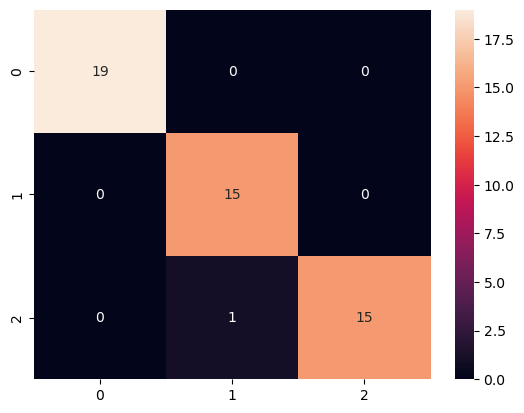

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf = confusion_matrix(ytest, ypred_test)
sns.heatmap(cf, annot=True, fmt='d')

In [15]:
# Classification Report 
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



Model has pretty good score on base knn algorithm

Q2) Write a Python code to implement the KNN regressor algorithm on load_boston dataset in
sklearn.datasets.

Read boston dataset

In [16]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [19]:
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

No missing values in dataset

Seperate X and Y

In [20]:
X = df.drop(labels=['medv'],axis=1)
Y = df['medv']

Train Test Split

In [21]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.2,random_state=42)

In [22]:
xtrain.shape, ytrain.shape

((404, 13), (404,))

In [23]:
xtest.shape, ytest.shape

((102, 13), (102,))

Implementing KNN Regressor Algorithm Base model

In [24]:
from sklearn.neighbors import KNeighborsRegressor
knnr = KNeighborsRegressor(n_neighbors=5)

In [25]:
knnr.fit(xtrain,ytrain)

KNeighborsRegressor()

In [26]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knnr,xtrain,ytrain,cv=5,scoring='r2')
scores

array([0.54227727, 0.43905346, 0.35690125, 0.53955425, 0.4431922 ])

In [27]:
import numpy as np
cval_score = np.mean(scores)
print(f'Mean Cross Validation R2 Score is : {cval_score:.4f}')

Mean Cross Validation R2 Score is : 0.4642


Above model has very Low cross validation score hence need to tune this model

Hyperparameter tuning of model

In [28]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # number of neighbors to consider
    'weights': ['uniform', 'distance'],  # weight function used in prediction
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # algorithm used to compute nearest neighbors
    'p': [1, 2]  # power parameter for Minkowski distance metric
}

In [29]:
from sklearn.model_selection import GridSearchCV
gscv = GridSearchCV(KNeighborsRegressor(),param_grid=param_grid,
                    cv=5, scoring='neg_mean_squared_error')

In [30]:
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [31]:
gscv.best_params_

{'algorithm': 'auto', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

In [32]:
gscv.best_score_

-33.2971448976826

Predict Test data


In [33]:
ypred_test = gscv.predict(xtest)
ypred_test

array([24.73786364, 31.72249009, 15.3507154 , 27.30501395, 17.2018207 ,
       25.80550606, 19.77102868, 15.86582451, 19.94556132, 20.51957611,
       23.34136189, 19.56304115, 12.34755581, 21.52977457, 23.20852325,
       22.26416486, 19.81820761, 14.24896371, 35.11804765, 11.62004094,
       27.83111718, 31.06348918, 16.3713894 , 19.4077173 , 17.60615938,
       20.66688916, 23.21525052, 11.55758578, 22.57776747, 20.58288984,
       24.09667949, 22.46416373, 10.30494761, 31.44171256, 20.23677213,
       21.15529179, 23.81484376, 19.24104178, 22.3877953 , 27.40639917,
       20.18090339, 31.74240806, 39.07315304, 21.66989478, 24.86095688,
       12.07345738, 16.41442709, 27.53919149, 19.93014439, 22.67300676,
       22.39242834, 36.48125731, 17.49914887, 22.49907307, 38.70586535,
       21.08122549, 12.42356856, 36.2305086 , 22.40289116, 21.37946557,
       21.62040381, 38.67943081, 35.59528839, 15.93855689, 29.07592693,
       20.38622952, 11.82438563, 26.09728109, 34.24273893, 13.94

Evaluate model on test data

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(ytest, ypred_test)
mse = mean_squared_error(ytest,ypred_test)
rmse = mse**(1/2)
r2 = r2_score(ytest,ypred_test)

In [35]:
print(f'Testing MAE  : {mae:.2f}')
print(f'Testing MSE  : {mse:.2f}')
print(f'Testing RMSE : {rmse:.2f}')
print(f'Testing R2   : {r2:.4f}')

Testing MAE  : 3.27
Testing MSE  : 21.00
Testing RMSE : 4.58
Testing R2   : 0.7137


Q3) Write a Python code snippet to find the optimal value of K for the KNN classifier algorithm using
cross-validation on load_iris dataset in sklearn.datasets.

Read dataset

In [36]:
from sklearn.datasets import load_iris
X, Y = load_iris(return_X_y=True)

Train Test Split

In [37]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.33,random_state=42)

Feature Scaling

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

Hyperparameter Tuning

In [39]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # number of neighbors to consider
    'weights': ['uniform', 'distance'],  # weight function used in prediction
    'metric': ['euclidean', 'manhattan']  # distance metric used
}

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
gscv_iris = GridSearchCV(KNeighborsClassifier(),param_grid=param_grid,scoring='accuracy',cv=5)
gscv_iris.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [41]:
gscv_iris.best_params_

{'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}

In [42]:
gscv_iris.best_score_

0.9400000000000001

Predict Test Data

In [43]:
ypred_test = gscv_iris.predict(xtest)
ypred_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

Evaluate test data

<AxesSubplot: >

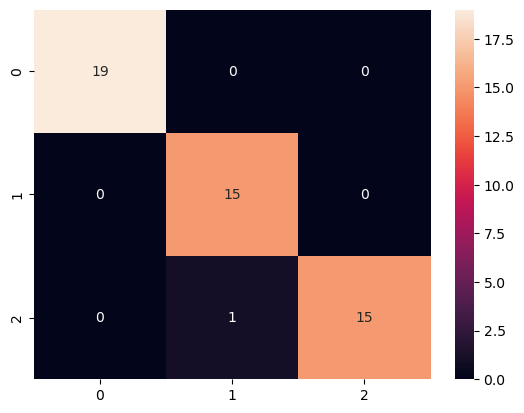

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf = confusion_matrix(ytest,ypred_test)
sns.heatmap(cf,annot=True,fmt='d')

In [45]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



Q4) Implement the KNN regressor algorithm with feature scaling on load_boston dataset in
sklearn.datasets.

Read Dataset

In [46]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Seperate X and Y

In [47]:
X = df.drop(labels=['medv'],axis=1)
Y = df[['medv']]

Train test Split


In [48]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.3,random_state=42)

In [49]:
xtrain.shape, ytrain.shape

((354, 13), (354, 1))

In [50]:
xtest.shape, ytest.shape

((152, 13), (152, 1))

Feature scaling with StandardScaler

In [51]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
xtrain = pd.DataFrame(scaler.fit_transform(xtrain),columns=xtrain.columns)
xtest = pd.DataFrame(scaler.transform(xtest),columns=xtest.columns)

In [52]:
xtrain.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,-0.414259,-0.505125,-1.292142,-0.281546,-0.851085,0.145264,-0.365584,1.081628,-0.746179,-1.112790,0.187271,0.396514,-1.015316
1,-0.402008,-0.505125,-0.162083,-0.281546,-0.087967,-0.208401,0.133941,-0.487876,-0.398464,0.150088,-0.212090,0.387067,-0.053663
2,-0.397211,-0.505125,-0.609489,-0.281546,-0.936828,-0.896237,-1.266900,0.628596,-0.746179,-1.046639,-0.167716,0.428541,-0.311324
3,-0.290936,-0.505125,-0.431970,-0.281546,-0.165136,-0.543965,-1.429789,0.345133,-0.630274,-0.601625,1.207859,0.312760,-0.822422
4,1.457816,-0.505125,1.005500,-0.281546,0.194987,-0.556496,0.079645,-0.403892,1.687825,1.557294,0.852872,0.104124,0.803800


In [53]:
xtest.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,-0.406801,-0.505125,-1.022256,-0.281546,-0.405218,0.125771,0.553831,-0.527348,-0.514369,-0.667776,-0.744571,0.412412,-0.476058
1,-0.411057,1.266629,-0.681651,3.551814,-0.945403,0.601965,-1.299478,0.146831,-0.630274,-0.920352,-0.300837,0.428541,-1.251858
2,-0.405120,-0.505125,2.396785,-0.281546,0.443643,-0.477130,1.085934,-0.893900,-0.630274,1.827911,0.808498,0.350317,0.795352
3,-0.406818,-0.505125,-0.046624,-0.281546,-1.236931,-0.362955,-2.208034,0.716631,-0.630274,-0.613653,0.409138,0.359533,-0.971669
4,0.195119,-0.505125,1.005500,-0.281546,1.335376,-0.039923,0.832552,-0.658340,1.687825,1.557294,0.852872,0.292484,0.682714


Creating Base KNN Regressor model

In [54]:
from sklearn.neighbors import KNeighborsRegressor
knnr = KNeighborsRegressor(n_neighbors=5)
knnr.fit(xtrain,ytrain)

KNeighborsRegressor()

In [55]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knnr,xtrain,ytrain,scoring='r2',cv=5)
scores

array([0.70757722, 0.6421702 , 0.71614969, 0.71381021, 0.72490399])

In [56]:
import numpy as np
cval_score = np.mean(scores)
print(f'Cross Validation R2 Score on training data is {cval_score:.4f}')

Cross Validation R2 Score on training data is 0.7009


Hyperparameter Tuning

In [57]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # number of neighbors to consider
    'weights': ['uniform', 'distance'],  # weight function used in prediction
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # algorithm used to compute nearest neighbors
    'p': [1, 2]  # power parameter for Minkowski distance metric
}

In [58]:
from sklearn.model_selection import GridSearchCV
gscv_boston = GridSearchCV(KNeighborsRegressor(),param_grid=param_grid,cv=5,scoring='r2')

In [60]:
gscv_boston.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='r2')

In [61]:
gscv_boston.best_params_

{'algorithm': 'auto', 'n_neighbors': 3, 'p': 2, 'weights': 'distance'}

In [62]:
gscv_boston.best_score_

0.7829978784524041

Predict Values on Test Data

In [63]:
ypred_test = gscv.predict(xtest)
ypred_test[0:5]

array([19.74435034, 19.74259828, 19.74302943, 19.74454149, 19.73959965])

Evaluate Model on test data

In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(ytest, ypred_test)
mse = mean_squared_error(ytest,ypred_test)
rmse = mse**(1/2)
r2 = r2_score(ytest,ypred_test)

In [65]:
print(f'Testing MAE  : {mae:.2f}')
print(f'Testing MSE  : {mse:.2f}')
print(f'Testing RMSE : {rmse:.2f}')
print(f'Testing R2   : {r2:.4f}')

Testing MAE  : 5.93
Testing MSE  : 77.25
Testing RMSE : 8.79
Testing R2   : -0.0367


Q5) Write a Python code snippet to implement the KNN classifier algorithm with weighted voting on
load_iris dataset in sklearn.datasets.

Read Iris dataset

In [66]:
from sklearn.datasets import load_iris
X, Y = load_iris(return_X_y=True)

Train Test Split

In [67]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.33,random_state=42)

In [68]:
xtrain.shape, ytrain.shape

((100, 4), (100,))

In [69]:
xtest.shape, ytest.shape

((50, 4), (50,))

Standard scaling xtrain and ytrain

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

Implement KNNClassifier with weighted distance

In [71]:
from sklearn.neighbors import KNeighborsClassifier
knnc = KNeighborsClassifier(n_neighbors=5,weights='distance')
knnc.fit(xtrain,ytrain)

KNeighborsClassifier(weights='distance')

In [72]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knnc,xtrain,ytrain,cv=5, scoring='accuracy')
scores

array([1.  , 0.85, 0.9 , 1.  , 0.95])

In [73]:
import numpy as np
cval_score = np.mean(scores)
print(f'Mean Cross Validation Score for 5 fold cross validation is {cval_score:.4f}')

Mean Cross Validation Score for 5 fold cross validation is 0.9400


Evaluating test data

In [74]:
ypred_test = knnc.predict(xtest)
ypred_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [75]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



Q6) Implement a function to standardise the features before applying KNN classifier.

In [76]:
# Creating a function to return model object and cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
import numpy as np

def scale_and_predict_knn(X,Y,n=5,test_size=0.33,cv=5):
    # Train Test Split
    xtrain, xtest, ytrain, ytest = train_test_split(X,Y ,test_size=test_size,random_state=42)
    # Standard Scaling the data
    scaler = StandardScaler()
    xtrain = scaler.fit_transform(xtrain)
    xtest = scaler.transform(xtest)
    # KNN Base Classifier
    knnc = KNeighborsClassifier(n_neighbors=n)
    knnc.fit(xtrain,ytrain)
    # Cross Val Estimation
    scores = cross_val_score(knnc, xtrain, ytrain, cv=cv,scoring='accuracy')
    # Mean Cross Val Score
    cval_score_mean = np.mean(scores)
    # Test Data Classification Report
    ypred_test = knnc.predict(xtest)
    print('Classification Report on Test data :\n')
    print(classification_report(ytest, ypred_test))
    return xtrain, xtest, ytrain, ytest, knnc, cval_score_mean    

In [77]:
# Load Cancer dataset
from sklearn.datasets import load_breast_cancer
X,Y = load_breast_cancer(return_X_y=True)

In [78]:
# Using the function to evaluate the data
xtrain, xtest, ytrain, ytest, knnc, cval_score_mean = scale_and_predict_knn(X,Y,n=5,test_size=0.2,cv=5)

Classification Report on Test data :

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [79]:
knnc

KNeighborsClassifier()

In [80]:
cval_score_mean

0.9604395604395606

Confusion Matrix

<AxesSubplot: >

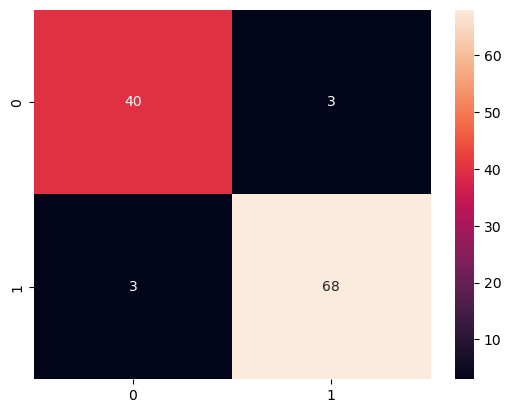

In [81]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf = confusion_matrix(ytest,knnc.predict(xtest))
sns.heatmap(cf,annot=True,fmt='d')

Q7) Write a Python function to calculate the euclidean distance between two points.

In [82]:
import math

def euclidean_distance(point1, point2):
    """Calculate the Euclidean distance between two points in n-dimensional space."""
    dimensions = len(point1)
    squared_sum = 0
    for i in range(dimensions):
        squared_sum += (point1[i] - point2[i]) ** 2
    return math.sqrt(squared_sum)

In [83]:
# Using Function to calculate euclidean Distance
point1 = [1, 2, 3]
point2 = [4, 5, 6]
distance = euclidean_distance(point1, point2)
print(distance) 

5.196152422706632


In [84]:
# Verifying distance manually for above points
a = (4-1)**2 + (5-2)**2 + (6-3)**2
a**0.5

5.196152422706632

Q8) Write a Python function to calculate the manhattan distance between two points.

In [85]:
def manhattan_distance(point1, point2):
    """Calculate the Manhattan distance between two points in n-dimensional space."""
    dimensions = len(point1)
    distance = 0
    for i in range(dimensions):
        distance += abs(point1[i] - point2[i])
    return distance